<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/3_mxrcnn/Train%20with%20-%20Resnet-101%20Backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/3_mxrcnn/installation
     
 - Select the right requirements file and run
 
     - cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install


# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

# About the Network

1. Blog 1 on Resnet Network - https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624

2. Blog 2 on Resnet Network - https://neurohive.io/en/popular-networks/resnet/

3. Blog 3 on Resnet Network - https://cv-tricks.com/keras/understand-implement-resnets/

4. Blog 4 on Redisual blocks - https://d2l.ai/chapter_convolutional-modern/resnet.html

5. Blog 1 on rcnn - https://medium.com/coinmonks/review-r-cnn-object-detection-b476aba290d1

6. Blog 2 on rcnn - https://towardsdatascience.com/r-cnn-3a9beddfd55a

7. Blog 1 on fast-rcnn - https://medium.com/coinmonks/review-fast-r-cnn-object-detection-a82e172e87ba

8. Blog 2 on fast-rcnn - https://towardsdatascience.com/part-2-fast-r-cnn-object-detection-7303e1988464

9. Blog 1 on faster rcnn - https://towardsdatascience.com/review-faster-r-cnn-object-detection-f5685cb30202

10. Blog 2 on faster rcnn - https://www.analyticsvidhya.com/blog/2018/11/implementation-faster-r-cnn-python-object-detection/

# COCO Format

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------kangaroo (coco_dir) 
          |         |
          |         |---Images (img_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations (anno_dir)
          |         |----|
          |              |--------------------instances_Train.json 
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/")
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/mx-rcnn")

In [2]:
from train_base import *

In [3]:
# Dataset params

In [4]:
root_dir = "../sample_dataset/";
coco_dir = "kangaroo";
img_dir = "Images"; 

In [5]:
set_dataset_params(root_dir=root_dir, 
                   coco_dir=coco_dir, imageset=img_dir);

In [6]:
# Model Type

In [7]:
set_model_params(model_name="resnet101");

In [8]:
# Hyper Params

In [9]:
set_hyper_params(gpus="0", lr=0.001, lr_decay_epoch="1", epochs=5, batch_size=1);

In [10]:
set_output_params(log_interval=100, save_prefix="model_resnet101");

In [11]:
# Preprocessing params

In [12]:
set_img_preproc_params(img_short_side=600, img_long_side=1000, 
                       mean=(123.68, 116.779, 103.939), std=(1.0, 1.0, 1.0));

In [13]:
# Initialize params

In [14]:
initialize_rpn_params();

In [15]:
initialize_rcnn_params();

In [16]:
# Remove caches if any

In [17]:
if os.path.isdir("../sample_dataset/cache/"):
    os.system("rm -r ../sample_dataset/cache/")

In [18]:
# Invoke Dataloader

In [19]:
roidb = set_dataset();

INFO:root:computing cache ../sample_dataset/cache/coco_Images_roidb.pkl
INFO:root:saving cache ../sample_dataset/cache/coco_Images_roidb.pkl
INFO:root:coco_Images num_images 164
INFO:root:filter roidb: 164 -> 164
INFO:root:coco_Images append flipped images to roidb


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [20]:
#Network

In [21]:
sym = set_network();

In [22]:
# Train

In [23]:
train(sym, roidb);

INFO:root:max input shape
{'bbox_target': (1, 36, 63, 63),
 'bbox_weight': (1, 36, 63, 63),
 'data': (1, 3, 1000, 1000),
 'gt_boxes': (1, 100, 5),
 'im_info': (1, 3),
 'label': (1, 1, 567, 63)}
INFO:root:max output shape
{'bbox_loss_reshape_output': (1, 128, 8),
 'blockgrad0_output': (1, 128),
 'cls_prob_reshape_output': (1, 128, 2),
 'rpn_bbox_loss_output': (1, 36, 63, 63),
 'rpn_cls_prob_output': (1, 2, 567, 63)}
INFO:root:locking params
['bn_data_gamma',
 'bn_data_beta',
 'conv0_weight',
 'bn0_gamma',
 'bn0_beta',
 'stage1_unit1_bn1_gamma',
 'stage1_unit1_bn1_gamma',
 'stage1_unit1_bn1_beta',
 'stage1_unit1_bn1_beta',
 'stage1_unit1_conv1_weight',
 'stage1_unit1_bn2_gamma',
 'stage1_unit1_bn2_gamma',
 'stage1_unit1_bn2_beta',
 'stage1_unit1_bn2_beta',
 'stage1_unit1_conv2_weight',
 'stage1_unit1_bn3_gamma',
 'stage1_unit1_bn3_gamma',
 'stage1_unit1_bn3_beta',
 'stage1_unit1_bn3_beta',
 'stage1_unit1_conv3_weight',
 'stage1_unit1_sc_weight',
 'stage1_unit2_bn1_gamma',
 'stage1_unit2_

INFO:root:Epoch[1] Train-RPNLogLoss=0.156246
INFO:root:Epoch[1] Train-RPNL1Loss=0.318017
INFO:root:Epoch[1] Train-RCNNAcc=0.843464
INFO:root:Epoch[1] Train-RCNNLogLoss=0.336797
INFO:root:Epoch[1] Train-RCNNL1Loss=2.544482
INFO:root:Epoch[1] Time cost=126.566
INFO:root:Saved checkpoint to "trained_model/model_resnet101-0002.params"
INFO:root:Epoch[2] Batch [0-100]	Speed: 2.59 samples/sec	RPNAcc=0.936378	RPNLogLoss=0.163721	RPNL1Loss=0.316492	RCNNAcc=0.840579	RCNNLogLoss=0.340409	RCNNL1Loss=2.495114
INFO:root:Epoch[2] Batch [0-200]	Speed: 2.60 samples/sec	RPNAcc=0.941212	RPNLogLoss=0.153108	RPNL1Loss=0.297122	RCNNAcc=0.846743	RCNNLogLoss=0.331477	RCNNL1Loss=2.504902
INFO:root:Epoch[2] Batch [0-300]	Speed: 2.58 samples/sec	RPNAcc=0.940096	RPNLogLoss=0.155659	RPNL1Loss=0.298073	RCNNAcc=0.847436	RCNNLogLoss=0.328048	RCNNL1Loss=2.506116
INFO:root:Epoch[2] Train-RPNAcc=0.941573
INFO:root:Epoch[2] Train-RPNLogLoss=0.152725
INFO:root:Epoch[2] Train-RPNL1Loss=0.292430
INFO:root:Epoch[2] Train-RC

# Running Inference

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/")
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/mx-rcnn")

In [2]:
from infer_base import *

In [3]:
class_file = set_class_list("Monk_Object_Detection/example_notebooks./sample_dataset/kangaroo/annotations/classes.txt");

In [4]:
#Model - Select the model as per number of iterations it has been trained for

In [5]:
set_model_params(model_name="resnet101", model_path="trained_model/model_resnet101-0004.params");

In [6]:
#Hyper Params

In [7]:
set_hyper_params(gpus="0", batch_size=1);

In [8]:
# Preprocessing

In [9]:
set_img_preproc_params(img_short_side=600, img_long_side=1000, 
                       mean=(123.68, 116.779, 103.939), std=(1.0, 1.0, 1.0));

In [10]:
#Initalization

In [11]:
initialize_rpn_params();

In [12]:
initialize_rcnn_params();

In [13]:
#Network

In [14]:
sym = set_network();
mod = load_model(sym);

In [15]:
#Load Image and infer

kangaroo
 0.839968740940094 [76.202548828125, 21.58392578125, 233.3891015625, 165.636015625]
['kangaroo\n', 0.839968740940094, [76.202548828125, 21.58392578125, 233.3891015625, 165.636015625]]


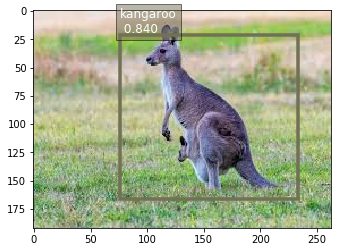

In [17]:
set_output_params(vis_thresh=0.8, vis=True)
Infer("Monk_Object_Detection/example_notebooks/sample_dataset/kangaroo/test/kg1.jpeg", mod);

kangaroo
 0.9335969090461731 [77.48757194430787, 23.246338123819324, 302.79963059158536, 134.14630025779934]
kangaroo
 0.846028208732605 [10.891073790219838, 39.07979634620783, 158.02866938383863, 123.54552639267621]
['kangaroo\n', 0.9335969090461731, [77.48757194430787, 23.246338123819324, 302.79963059158536, 134.14630025779934]]


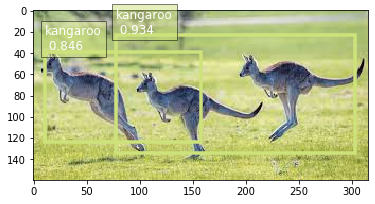

In [18]:
set_output_params(vis_thresh=0.8, vis=True)
Infer("Monk_Object_Detection/example_notebooks/sample_dataset/kangaroo/test/kg2.jpeg", mod);

kangaroo
 0.9041311144828796 [77.32174202827781, 18.040117517596975, 232.24926320076926, 152.0463868198854]
['kangaroo\n', 0.9041311144828796, [77.32174202827781, 18.040117517596975, 232.24926320076926, 152.0463868198854]]


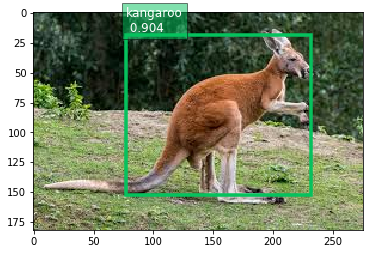

In [19]:
set_output_params(vis_thresh=0.8, vis=True)
Infer("Monk_Object_Detection/example_notebooks/sample_dataset/kangaroo/test/kg3.jpeg", mod);

kangaroo
 0.8092113137245178 [22.210584025635338, 32.37846756883782, 454.22681747023626, 246.98412454090416]
['kangaroo\n', 0.8092113137245178, [22.210584025635338, 32.37846756883782, 454.22681747023626, 246.98412454090416]]


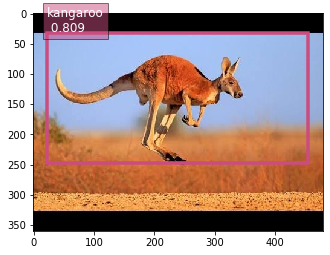

In [20]:
set_output_params(vis_thresh=0.8, vis=True)
Infer("Monk_Object_Detection/example_notebooks/sample_dataset/kangaroo/test/kg4.jpeg", mod);

kangaroo
 0.9107127785682678 [14.49167386230672, 111.48510250872833, 514.3983171966606, 387.79805499634074]
kangaroo
 0.7634366154670715 [284.94278040219933, 19.260030056941982, 435.5298924968365, 330.6227747104961]
['kangaroo\n', 0.9107127785682678, [14.49167386230672, 111.48510250872833, 514.3983171966606, 387.79805499634074]]


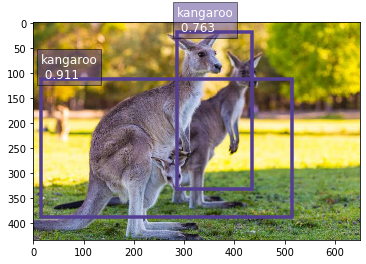

In [22]:
set_output_params(vis_thresh=0.7, vis=True)
Infer("Monk_Object_Detection/example_notebooks/sample_dataset/kangaroo/test/kg5.jpeg", mod);